4.3 Find the array factor for a two element array with 

(a) Thinking about the relative phase of the fields radiated by the two elements and how they add in the far field

In [18]:
# python code to include the image


(b) Plotting the phasors which sum to the array factor in the complex plane as a function of angle

Using equation (4.3) in the book $$ A(\theta,\phi)=\sum_{n=1}^{N}\frac{i_n}{I_0}e^{jk.r_n} $$ we can plot the phasors as a function of angle. This can be done by setting $r_n=nk\cos\theta$ giving the phasor $$ e^{jknd\cos\theta} $$

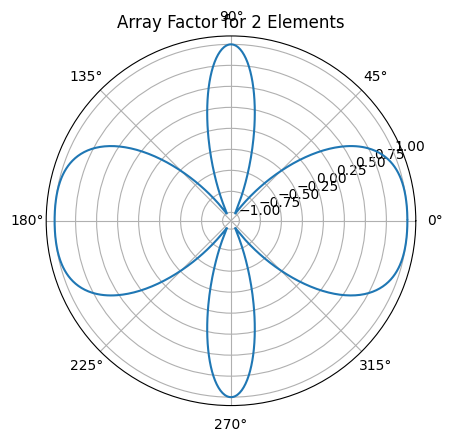

In [19]:
import numpy as np
import matplotlib.pyplot as plt

f = 2.4e9                                   # frequency
lam = 3e8/f                                 # wavelength
d = lam                                     # spacing
k = 2*np.pi/lam                             # wavenumber
n = 1                                       # number of elements
theta = np.linspace(0.01, 2*np.pi, 1000)    # angle
A = np.exp(1j*k*d*n*np.cos(theta))          # array factor

# plots
plt.polar(theta, A)
plt.title("Array Factor for 2 Elements")
plt.show()

(c) visible window method

For the visible window method the array factor is calculated with the Dirichlet function $$ F_a(u)=\frac{\sin^2(Nu/2)}{\sin^2(u/2)} $$ where $u=kd\cos\theta + \psi$

Once plotted a window is chosen in the following way 

$$ \psi-kd \< u \< \psi + kd$$

Wher $\psi=\$

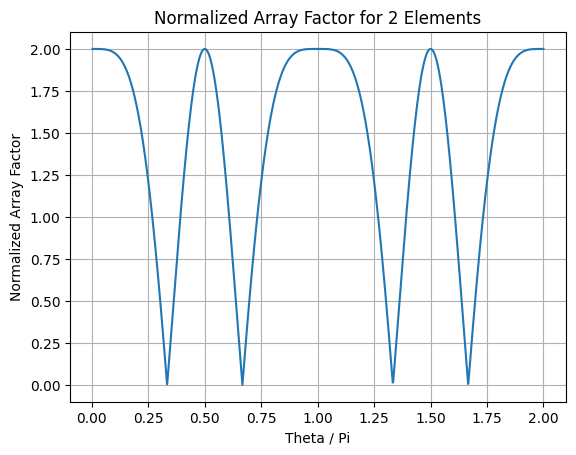

In [20]:
u = k*d*np.cos(theta)
N = 2
F = np.sin(N*u/2)/np.sin(u/2)
plt.plot(theta/(np.pi), np.abs(F))
plt.title("Normalized Array Factor for 2 Elements")
plt.xlabel("Theta / Pi")
plt.ylabel("Normalized Array Factor")
plt.grid()
plt.show()

(d) schelkunoff's unit circle representation